In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [29]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [30]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f"The most recent date in the dataset is {latest_date}.")

The most recent date in the dataset is 2017-08-23.


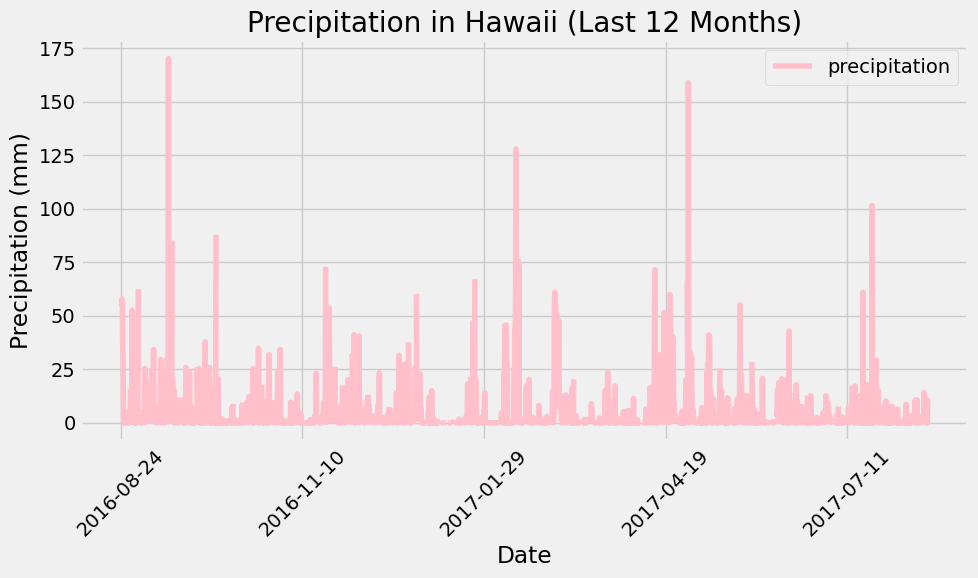

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

last_date = session.query(func.max(Measurement.date)).scalar()
last_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
last_date = session.query(func.max(Measurement.date)).scalar()
last_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_scores, columns=['date', 'precipitation'])
precipitation_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_df.sort_values(by=['date'], inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize=(10,6), color='pink')
plt.title("Precipitation in Hawaii (Last 12 Months)")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).scalar()

print(f'Total number of stations: {station_count}')

Total number of stations: 9


In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
from sqlalchemy import desc

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                  group_by(Measurement.station).\
                  order_by(desc(func.count(Measurement.station))).all()

for station, count in active_stations:
    print(f'Station {station} has {count} rows')

Station USC00519281 has 2772 rows
Station USC00519397 has 2724 rows
Station USC00513117 has 2709 rows
Station USC00519523 has 2669 rows
Station USC00516128 has 2612 rows
Station USC00514830 has 2202 rows
Station USC00511918 has 1979 rows
Station USC00517948 has 1372 rows
Station USC00518838 has 511 rows


In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                            filter(Measurement.station == active_stations[0][0]).all()

# Print the results
print(f"Lowest temperature: {most_active_station_temps[0][0]}")
print(f"Highest temperature: {most_active_station_temps[0][1]}")
print(f"Average temperature: {most_active_station_temps[0][2]}")

Lowest temperature: 12.2
Highest temperature: 29.4
Average temperature: 22.03582251082252


In [38]:
from datetime import datetime, timedelta

# Find the last date in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Calculate the date one year from the last date in the database
last_date = datetime.strptime(last_date, '%Y-%m-%d')
prev_year = last_date - timedelta(days=365)


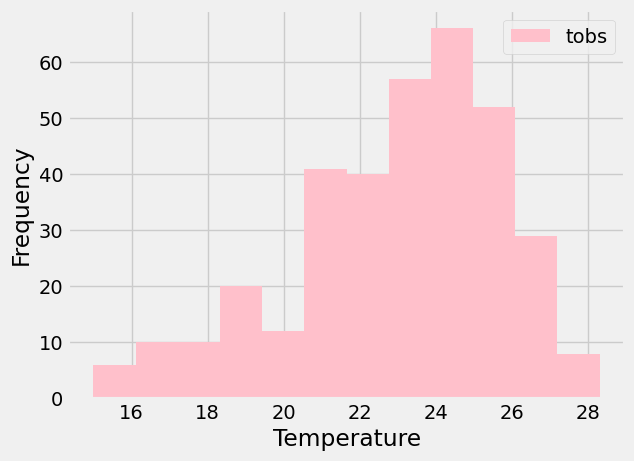

In [39]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()

# Load the query results into a Pandas DataFrame
df = pd.DataFrame(results, columns=['date', 'temperature'])

# Plot the histogram with 12 bins
plt.hist(df['temperature'], bins=12, color='pink')

# Add x-axis and y-axis labels and a plot title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(["tobs"], loc="upper right")


# Display the plot
plt.show()

# Close Session

In [40]:
# Close Session
session.close()